In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/nsduh_sample.csv')
print("Shape:", df.shape)
df.head()

Shape: (10000, 6)


,age,gender,income,education,mental_health,drug_use
0,56,0,81407,3,0,0
1,46,0,73821,4,0,0
2,32,1,55690,1,0,0
3,60,0,26654,2,0,0
4,25,0,87557,3,0,0


In [2]:
df.info()
print(df.isnull().sum())
target_col = 'drug_use'
print(df[target_col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            10000 non-null  int64
 1   gender         10000 non-null  int64
 2   income         10000 non-null  int64
 3   education      10000 non-null  int64
 4   mental_health  10000 non-null  int64
 5   drug_use       10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB
age              0
gender           0
income           0
education        0
mental_health    0
drug_use         0
dtype: int64
drug_use
0    8702
1    1298
Name: count, dtype: int64


In [3]:
df = df.dropna(subset=[target_col])
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [5]:
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

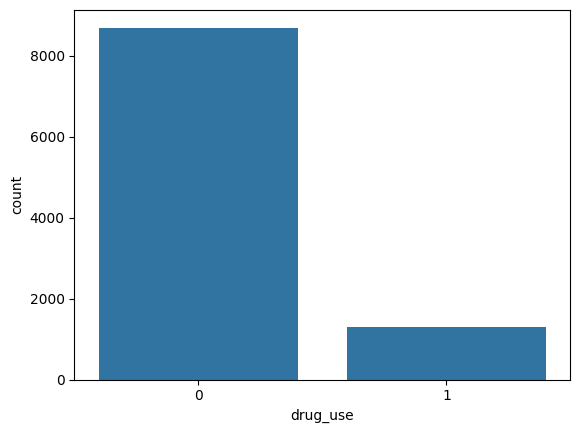

In [7]:
sns.countplot(x=y)
plt.show()